In [3]:
import pandas as pd
import numpy as np
import os
import ast
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# merge files into one

output_file = 'merged.csv'


file_pattern = os.path.join('200_2000_*.csv')
file_list = glob.glob(file_pattern)


merged_df = pd.concat((pd.read_csv(f) for f in file_list), ignore_index=True)


merged_df.to_csv(output_file, index=False)

In [5]:
# show the dataframe

df = pd.read_csv('merged.csv')

print(df.head())

   Run                                Exposures Over Time  \
0  1.0  [28794.0, 28794.0, 28794.0, 35366.0, 35366.0, ...   
1  2.0  [35315.0, 35315.0, 35315.0, 35315.0, 35315.0, ...   
2  3.0  [41991.0, 41991.0, 41991.0, 41991.0, 41991.0, ...   
3  4.0  [38790.0, 38790.0, 38790.0, 38790.0, 38790.0, ...   
4  5.0  [33773.0, 34209.0, 34209.0, 34209.0, 34209.0, ...   

                 Number of Bankrupt Agents Over Time  \
0  [72.0, 72.0, 72.0, 110.0, 110.0, 110.0, 110.0,...   
1  [111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111...   
2  [139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139...   
3  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...   
4  [102.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105...   

                                    Simulated Prices  \
0  [50.0, 50.43019992753261, 50.08103220349575, 5...   
1  [50.0, 48.15802276164415, 47.917300228981844, ...   
2  [50.0, 49.99585793236978, 51.98666758737647, 5...   
3  [50.0, 49.498340580622084, 49.96472090453163, ...   
4  [50.0, 46.698

In [6]:
# get a dictionary including the average of six indicators over multiple simulations

def get_simulation_averages_with_titles(df):
    def safe_literal_eval(s):
        try:
            return ast.literal_eval(s)
        except (ValueError, SyntaxError):
            return np.nan

    def calculate_average_list(column):
        return column.apply(safe_literal_eval).apply(lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan)

    averages_dict = {}
    for column in df.columns[1:]:
        avg = calculate_average_list(df[column])
        averages_dict[column] = avg.tolist()

    return averages_dict


result = get_simulation_averages_with_titles(df)
print(result)

{'Exposures Over Time': [37210.613, 37154.7435, 42657.1825, 40149.8335, 35007.2895, 41696.7595, 39337.0275, 38591.073, 42500.2635, 39004.629, 35213.4675, 30278.261, 33238.7165, 35246.4, 36078.5475, 37321.242, 29624.678, 32745.837, 34669.333, 32542.0535, 42778.0845, 41924.865, 41249.748, 42684.673, 40772.764, 44211.427, 46142.707, 42575.3485, 44136.209, 40583.0475, 43256.987, 40404.3805, 46043.0645, 38234.4265, 42042.694, 36565.0, 38784.189, 41649.8415, 43349.1665, 38881.0, 47562.716, 39582.6305, 43795.791, 38838.551, 41251.798, 39147.745, 41699.323, 38746.2085, 40586.6045, 38956.792, 23780.3575, 25237.867, 25804.4135, 22868.882, 26981.5285, 24282.1665, 25057.0845, 25635.378, 26414.884, 24054.474, 24390.066, 24053.3095, 23775.494, 27422.6875, 26544.934, 23972.7665, 25878.4045, 25310.928, 26061.589, 26362.892, 36951.972, 33632.3055, 31830.8535, 32887.5635, 34174.4055, 35083.668, 31875.395, 34380.963, 35236.8515, 40487.862, 40328.384, 41972.7005, 35686.0995, 36381.7175, 37304.477, 39076.6

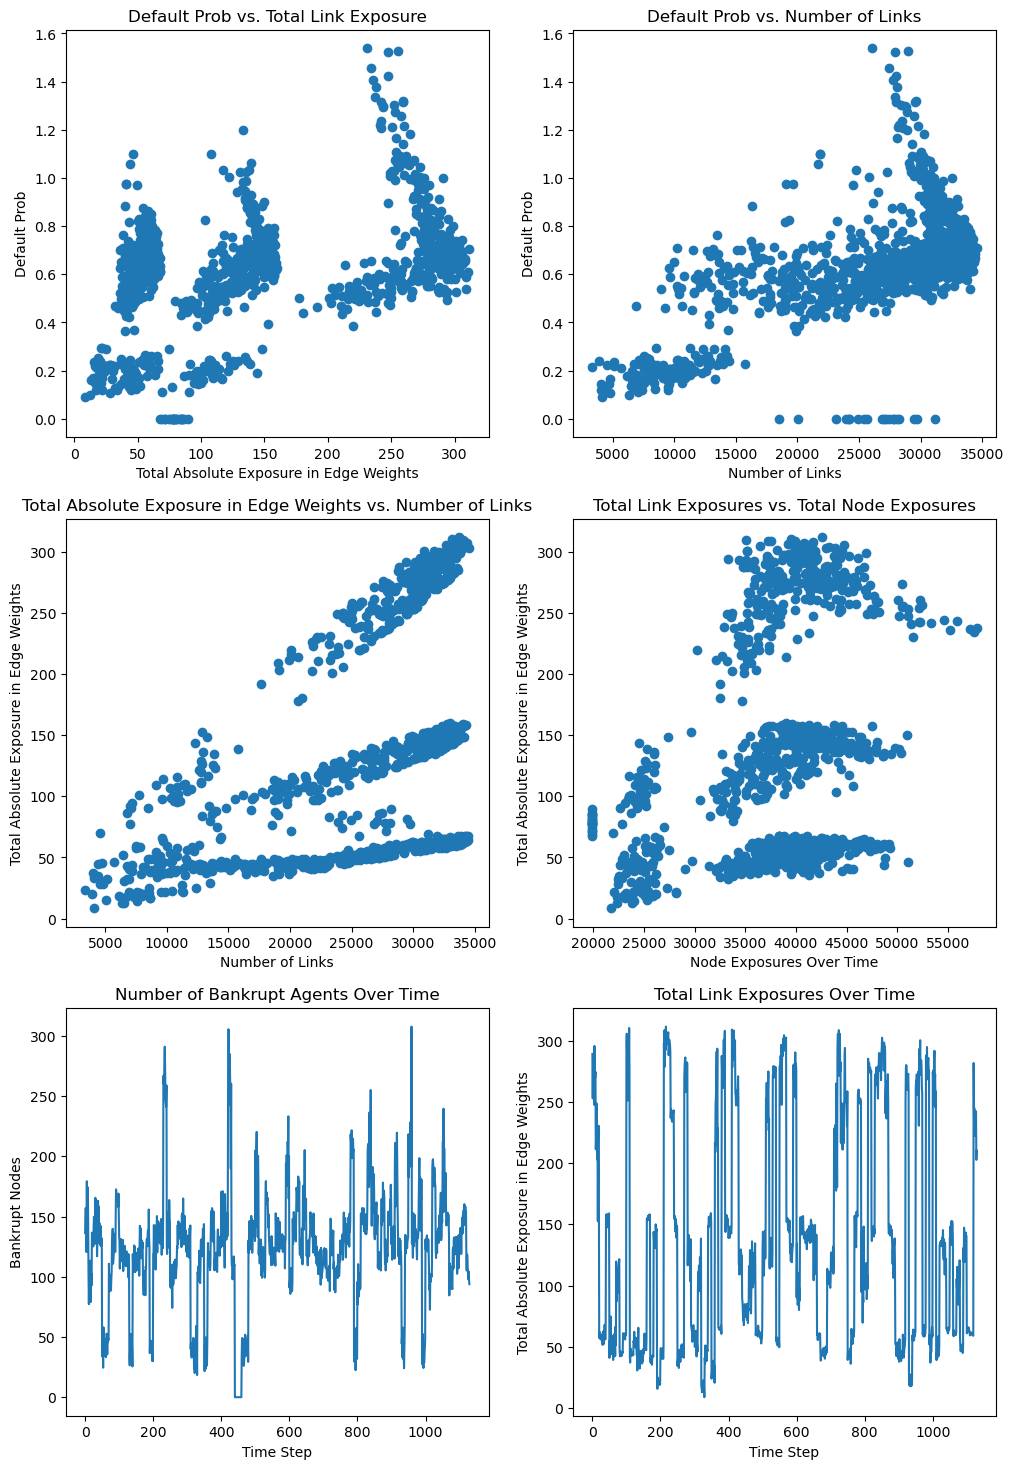

In [12]:
# plot: Default Prob vs. Total Link Exposure

total_node_exposure = result['Exposures Over Time']
bankrupt_nodes = result['Number of Bankrupt Agents Over Time']
simulated_price = result['Simulated Prices']
total_link_exposure = result['Total Absolute Exposure in Edge Weights']
num_of_links = result['Links Over Time']
total_nodes = result['Node Population Over Time']

time_step = list(range(len(bankrupt_nodes)))

default_prob = [n / p if p != 0 else 0 for n, p in zip(bankrupt_nodes, total_nodes)]
# result['Default Prob'] = default_prob

plt.figure(figsize=(12, 18))


plt.subplot(3, 2, 1)
plt.scatter(total_link_exposure, default_prob)
plt.xlabel('Total Absolute Exposure in Edge Weights')
plt.ylabel('Default Prob')
plt.title('Default Prob vs. Total Link Exposure')


plt.subplot(3, 2, 2)
plt.scatter(num_of_links, default_prob)
plt.xlabel('Number of Links')
plt.ylabel('Default Prob')
plt.title('Default Prob vs. Number of Links')


plt.subplot(3, 2, 3)
plt.scatter(num_of_links, total_link_exposure)
plt.xlabel('Number of Links')
plt.ylabel('Total Absolute Exposure in Edge Weights')
plt.title('Total Absolute Exposure in Edge Weights vs. Number of Links')


plt.subplot(3, 2, 4)
plt.scatter(total_node_exposure, total_link_exposure)
plt.xlabel('Node Exposures Over Time')
plt.ylabel('Total Absolute Exposure in Edge Weights')
plt.title('Total Link Exposures vs. Total Node Exposures')


plt.subplot(3, 2, 5)
plt.plot(time_step, bankrupt_nodes)
plt.xlabel('Time Step')
plt.ylabel('Bankrupt Nodes')
plt.title('Number of Bankrupt Agents Over Time')


plt.subplot(3, 2, 6)
plt.plot(time_step, total_link_exposure)
plt.xlabel('Time Step')
plt.ylabel('Total Absolute Exposure in Edge Weights')
plt.title('Total Link Exposures Over Time')

plt.show()

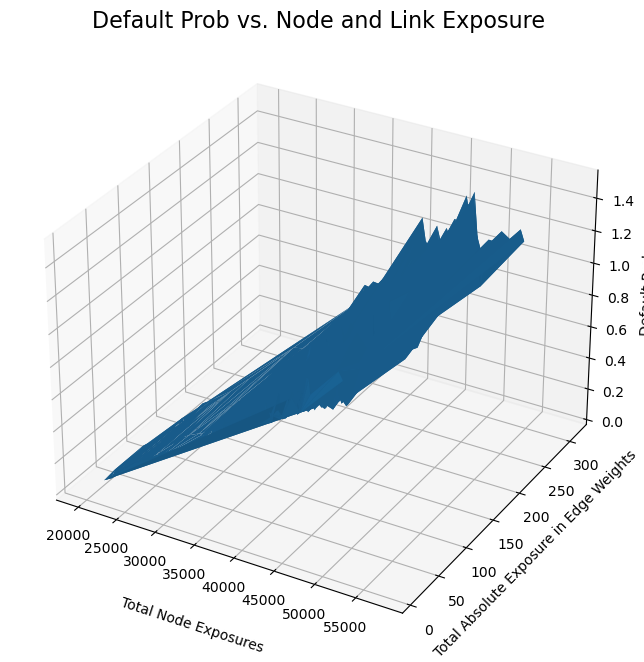

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(total_node_exposure, total_link_exposure, default_prob)

ax.set_xlabel('Total Node Exposures', labelpad=15)
ax.set_ylabel('Total Absolute Exposure in Edge Weights')
ax.set_zlabel('Default Prob')
ax.set_title('Default Prob vs. Node and Link Exposure', fontdict={'fontsize': 16})

plt.show()